In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("waves.csv")
df.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Ohio Street Beach,06/02/2019 05:00:00 PM,17.1,0.78,NaN,0.232,4.0,10.9,06/02/2019 5:00 PM,OhioStreetBeach201906021700
1,63rd Street Beach,09/18/2013 10:00:00 AM,18.9,7.56,1.517,0.140,4.0,11.0,09/18/2013 10:00 AM,63rdStreetBeach201309181000
2,63rd Street Beach,06/12/2014 12:00:00 PM,25.4,3.45,-0.072,0.031,9.0,12.2,06/12/2014 12:00 PM,63rdStreetBeach201406121200
3,63rd Street Beach,06/12/2014 01:00:00 PM,18.1,3.31,1.818,0.339,10.0,12.2,06/12/2014 1:00 PM,63rdStreetBeach201406121300
4,63rd Street Beach,06/12/2014 02:00:00 PM,17.5,2.93,1.545,0.136,4.0,12.2,06/12/2014 2:00 PM,63rdStreetBeach201406121400


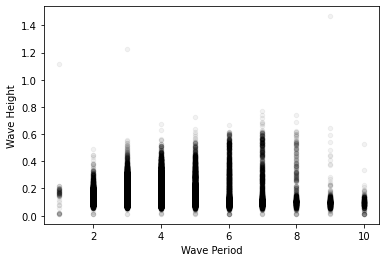

In [65]:
df = df[(df['Wave Period'] > 0) & (df['Wave Height'] > 0)]
df.plot.scatter(x = 'Wave Period', y = 'Wave Height', color = 'k', alpha = 0.05)

In [66]:
beach_names = sorted(set(df['Beach Name']))
beach_names

['63rd Street Beach',
 'Calumet Beach',
 'Montrose Beach',
 'Ohio Street Beach',
 'Osterman Beach',
 'Rainbow Beach']

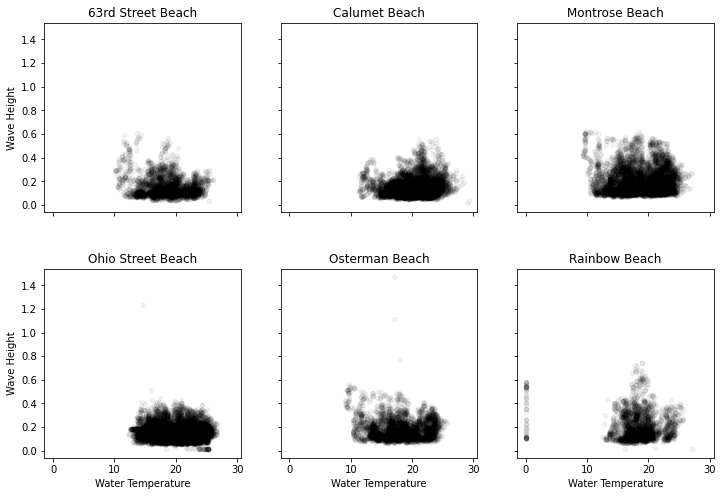

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
axes = list(axes.reshape(-1)) # flatten to one dimension, as long as necessary

beach_names = sorted(set(df["Beach Name"]))
for b in beach_names:
    ax = axes.pop(0) # remove first from list, put to ax
    ax.set_title(b)
    beach_df = df[df["Beach Name"] == b] # get only those rows where beach name is b
    beach_df.plot.scatter(x="Water Temperature", y="Wave Height", 
                          color="k", alpha=0.05, ax=ax)

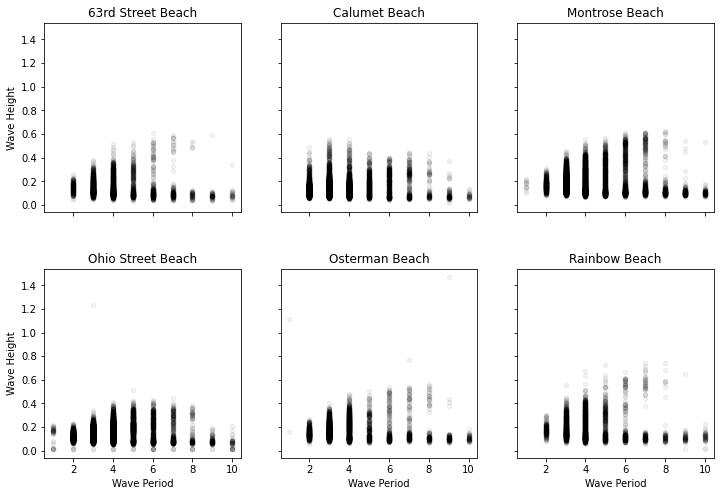

In [68]:
fig, axes = plt.subplots(2,3, figsize = (12, 8), sharex=True, sharey = True)
plt.subplots_adjust(hspace = 0.3)
axes = list(axes.reshape(-1))
for b in beach_names:
    ax = axes.pop(0)
    ax.set_title(b)
    beach_df = df[df['Beach Name'] == b]
    beach_df.plot.scatter(x = 'Wave Period', y = 'Wave Height', color =  'k', alpha = 0.05, ax = ax)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [40]:
train, test = train_test_split(df)
train.head()

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
18970,Ohio Street Beach,07/06/2014 03:00:00 PM,18.5,2.12,1.549,0.155,3.0,10.5,07/06/2014 3:00 PM,OhioStreetBeach201407061500
36832,Ohio Street Beach,07/24/2018 10:00:00 PM,21.4,1.81,NaN,0.147,4.0,10.3,07/24/2018 10:00 PM,OhioStreetBeach201807242200
29876,Osterman Beach,06/10/2015 01:00:00 AM,14.5,2.16,NaN,0.086,6.0,10.6,06/10/2015 1:00 AM,OstermanBeach201506100100
28568,Osterman Beach,07/24/2014 04:00:00 PM,18.5,4.38,1.389,0.238,3.0,11.4,07/24/2014 4:00 PM,OstermanBeach201407241600
1755,63rd Street Beach,06/20/2015 10:00:00 PM,17.0,2.37,NaN,0.143,3.0,10.1,06/20/2015 10:00 PM,63rdStreetBeach201506202200


In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin

In [84]:
oh = OneHotEncoder()
oh.fit(train[['Beach Name']])
oh.transform(train[['Beach Name']]).toarray()

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [97]:
class BetterOneHot(TransformerMixin):
    def __init__(self, col):
        self.col = col
        self.oh = OneHotEncoder()
        
    def fit(self, X, y =None):
        self.oh.fit(X[[self.col]])
        return self
    
    def transform(self, X):
        ones = self.oh.transform(X[[self.col]])
        ones = pd.DataFrame(ones.toarray(), columns = self.oh.get_feature_names(), index = X.index)
        return pd.concat((X.drop(columns = [self.col]), ones), axis = 1)

In [98]:
oh = BetterOneHot('Beach Name')
data = oh.fit_transform(train[['Beach Name', 'Wave Period']])
data

,Wave Period,x0_63rd Street Beach,x0_Calumet Beach,x0_Montrose Beach,x0_Ohio Street Beach,x0_Osterman Beach,x0_Rainbow Beach
18970,3.0,0.0,0.0,0.0,1.0,0.0,0.0
36832,4.0,0.0,0.0,0.0,1.0,0.0,0.0
29876,6.0,0.0,0.0,0.0,0.0,1.0,0.0
28568,3.0,0.0,0.0,0.0,0.0,1.0,0.0
1755,3.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
37651,3.0,0.0,0.0,0.0,1.0,0.0,0.0
21044,6.0,0.0,0.0,0.0,1.0,0.0,0.0
2069,8.0,1.0,0.0,0.0,0.0,0.0,0.0
29435,4.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
xcols = ['Beach Name', 'Wave Period']
#xcols = ['Wave Period']
ycol = 'Wave Height'

p = Pipeline([
    ('onehot', BetterOneHot('Beach Name')),
    ('poly', PolynomialFeatures(2)),
    ('lreg', LinearRegression())
])

p.fit(train[xcols], train[ycol])
(
    explained_variance_score(train[ycol], p.predict(train[xcols])),
    explained_variance_score(test[ycol], p.predict(test[xcols])),
)

(0.09588791720729406, 0.08833615970734732)

In [109]:
df1 = pd.DataFrame({"fruit": ["apple", "banana", "kiwi"]})
df2 = pd.DataFrame({"fruit": ["apple", "apple", "banana"]})
df1

,fruit
0,apple
1,banana
2,kiwi


In [114]:
oh = OneHotEncoder(handle_unknown="ignore")
oh.fit(df2)
data = oh.transform(df1).toarray() # TODO: convert from spares array to regular array
pd.DataFrame(data, columns=oh.get_feature_names())

,x0_apple,x0_banana
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0


In [121]:
p['lreg'].coef_, p['lreg'].intercept_

(array([ 7.91883230e+06, -1.83554182e+09,  2.02363881e+08,  4.00253566e+08,
         2.26110098e+08, -1.69771983e+08,  1.27681465e+08, -2.34181414e+08,
        -4.77539178e-03,  1.83554182e+09,  1.83554182e+09,  1.83554182e+09,
         1.83554182e+09,  1.83554182e+09,  1.83554182e+09, -3.08292270e+08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -5.06181955e+08,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.32038487e+08,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.38435933e+07,  0.00000000e+00,
         0.00000000e+00, -2.33609855e+08,  0.00000000e+00,  1.28253024e+08]),
 98009557.2684694)

Text(0, 0.5, 'Wave Height (Meters)')

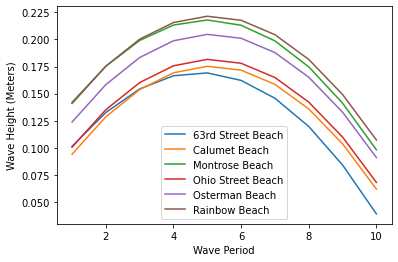

In [132]:
def plot_beach(name, ax):
    df = pd.DataFrame({
        'Beach Name': name,
        'Wave Period': np.arange(1, 11, 1),
    })
    df['predicted_wave'] = p.predict(df)
    ax = df.plot.line(x = 'Wave Period', y = 'predicted_wave', label = name, ax = ax)
    return ax

ax = None
for name in beach_names:
    ax = plot_beach(name, ax)

ax.set_ylabel('Wave Height (Meters)')

In [123]:
train[xcols]

,Beach Name,Wave Period
18970,Ohio Street Beach,3.0
36832,Ohio Street Beach,4.0
29876,Osterman Beach,6.0
28568,Osterman Beach,3.0
1755,63rd Street Beach,3.0
...,...,...
37651,Ohio Street Beach,3.0
21044,Ohio Street Beach,6.0
2069,63rd Street Beach,8.0
29435,Osterman Beach,4.0
